# Week 3 of Introduction to Biological System Design
## Introduction to Modeling Biological Processes
### Ayush Pandey

Pre-requisite: If you have installed numpy, scipy, matplotlib, and pandas already, then you are all set to run this notebook.

This notebook introduces modeling of biological processes using differential equations. Note that to model the growth of any variable $x$, we can write a differential equation:

$\frac{dx}{dt} = f(x,t)$

where the function $f(x,t)$ models the rate of change of the variable $x$. In this notebook, we will use this formalism of modeling systems (deterministic ordinary differential equations) to study transcription and translation.

# ODE Modeling with Python
## Introduction to `scipy.integrate`

For Homework 2, you implemented your own numerical integrator by using a form of backward difference method to compute the derivative. This method is often referred to as the Euler's method to integrate differential equations. The scientific computing workhorse of the Python language `Scipy` consists of various integration algorithms. One of the best method in the `scipy.integrate` module is called `odeint`. We will use `odeint` in this notebook and throughout the course quite often to integrate ODE models. 

You can look at the `odeint` documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html


Let us learn how to use `odeint` by simulating a simple birth and death model:

### Growth and death model

Let us assume that a species $x$ grows at the rate $k$ and dies at a rate of $d$. We can write a one-variable ODE model for this species:

$\frac{dx}{dt} = k - d\cdot x$

To simulate this model, we can integrate this ODE over a set of time points and plot the result as $x(t)$ vs $t$ on a graph. 

Define the ODE as a Python function. We can use the `*args` argument to pass multiple parameters to our ODE. Inside the function, we can unfold args to get out the parameter values from it. The function defines the ODE by defining the right hand side of the differential equation. Recall that we used similar function definitions to integrate using our crude numerical integrator. 

In [78]:
def growth_death_ode(x, t, *args):
    k, d = args
    return k - d*x

from scipy.integrate import odeint
import numpy as np
# It is often helpful to use Python functions with keyword arguments, so we know 
# the meanings of the arguments that are passed. This is helpful in easy debugging, as well as in documenting the 
# code better.
k = 1.0
d = 0.1
initial_values = np.array([0])
timepoints = np.linspace(0,50,100)
solution = odeint(func = growth_death_ode, y0 = initial_values, t = timepoints, 
                  args = (k, d))

### Take a look at what odeint returns by running the next cell 
(uncomment to run)

In [79]:
# solution

### Plot the simulated ODE with time:

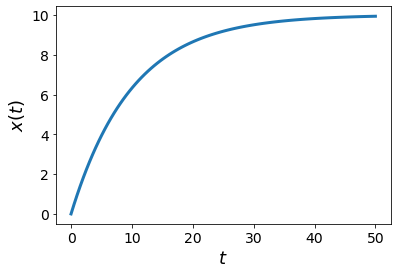

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(timepoints, solution, lw = 3)
ax.set_xlabel('$t$', fontsize = 18)
ax.set_ylabel('$x(t)$', fontsize = 18)
ax.tick_params(labelsize = 14)

You can compare odeint performance with your numerical integrator by running both simultaneously.

## Validate `odeint` simulation with analytical solution

Since the birth-death model that we considered is a simple equation that can be integrated analytically, we can validate the numerical ODE simulation by comparing it to our analytical solution. Note that analytically solving an ODE is not possible for all kinds of ODEs, especially, as write more complicated models it may not be possible to obtain a closed form solution.

For the model above, the analytical solution is given by:

$ x(t) = \frac{k}{d}(1 - e^{-d(t - t_0)}) - x(0)e^{-d(t - t_0)}$

Let us plot this analytical solution alongside the numerical simulation:

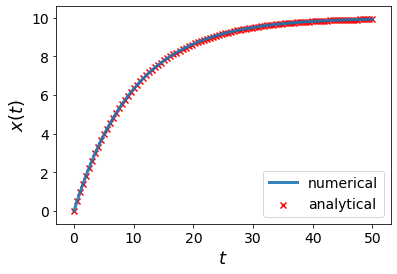

In [101]:
def analytical_solution(t, k, d, t0, x0):
    return (k/d)*(1 - np.exp(-d*(t - t0))) - x0*np.exp(-d*(t - t0))

x0 = initial_values
t0 = timepoints[0]
fig, ax = plt.subplots()
ax.plot(timepoints, solution, lw = 3, label = 'numerical', alpha = 0.9)
ax.scatter(timepoints, analytical_solution(timepoints, k, d, t0, x0), c = 'r', 
           marker = 'x', label = 'analytical')
ax.set_xlabel('$t$', fontsize = 18)
ax.set_ylabel('$x(t)$', fontsize = 18)
ax.legend(fontsize = 14)
ax.tick_params(labelsize = 14)

`odeint` has various options that you can explore in the documentation. For example, you can use the `rtol` and the `atol` option to set the tolerance levels of the integration algorithm. The tolerance levels decide the accuracy of the solution => lower the tolerance for error, more accurate the simulation, but also it is slower. So you have a speed-accuracy tradeoff. You can also take a look at the `infodict` that is returned when you pass in `full_output = True`. The `infodict` dictionary consists of information about the solver and the steps it took. Finally, an advanced version of `odeint` is `solve_ivp` which has multiple algorithms to integrate ODEs. However, the disadvantage is that it has slightly higher overhead and needs to be setup correctly inorder to get reliable simulations for ill-conditioned differential equations.